Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

1. Dataset has been downloaded and saved in the path /Assignment/Datasets/50_Startups.csv

2. Load the dataset

In [3]:
sheet = pd.read_csv('../Datasets/50_Startups.csv')

3. Perform Below Visualizations

3.1 Univariate Analysis

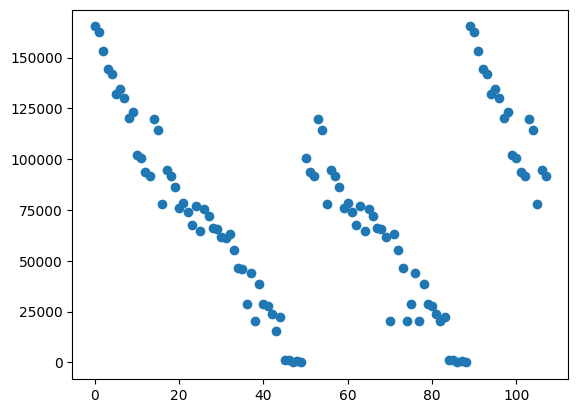

In [4]:
plt.scatter(sheet.index, sheet['R&D Spend'])

3.2 Bi - Variate Analysis

<AxesSubplot: xlabel='Marketing Spend', ylabel='Profit'>

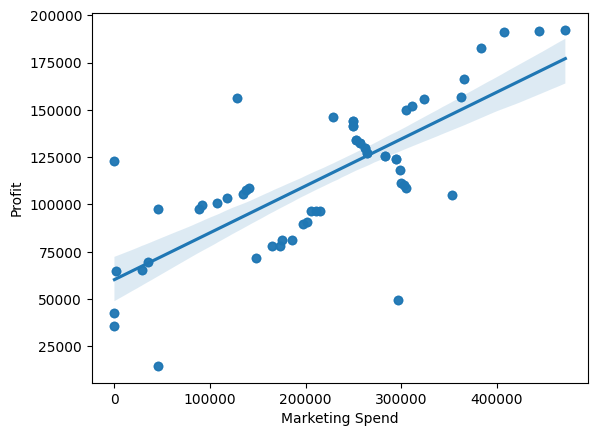

In [5]:
sns.regplot(
    x='Marketing Spend', 
    y='Profit', 
    data=sheet
)

3.3 Multi Variate Analysis

<AxesSubplot: xlabel='Administration', ylabel='Marketing Spend'>

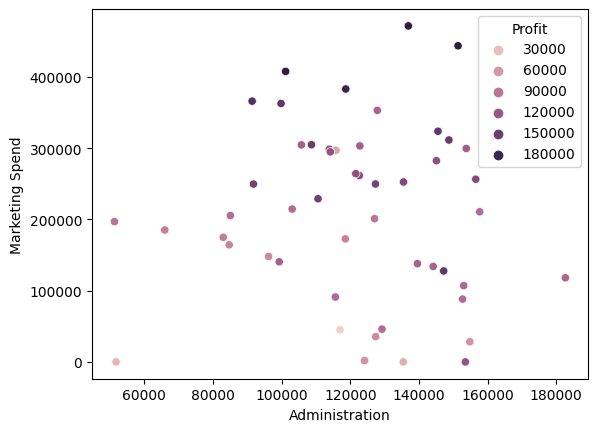

In [6]:
sns.scatterplot(
    x='Administration',
    y='Marketing Spend',
    data=sheet,
    hue='Profit'
)

4. Perform Descriptive Statistics on the dataset

In [7]:
avg = sheet['Profit'].mean()
print("Mean: ",avg)
med = sheet['Profit'].median()
print("median: ",med)
sd = sheet['Profit'].std()
print("Standard Deviation",sd)

Mean:  113523.75999999998
median:  109543.12
Standard Deviation 38991.013653656955


5. Handle the Missing Values

In [8]:
md = pd.notnull(sheet['State'])
md.fillna(0)
sheet[md]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
...,...,...,...,...,...
103,119943.24,156547.42,256512.92,Florida,132602.65
104,114523.61,122616.84,261776.23,New York,129917.04
105,78013.11,121597.55,264346.06,California,126992.93
106,94657.16,145077.58,282574.31,New York,125370.37


6. Find the outliers and replace the outliers

<AxesSubplot: >

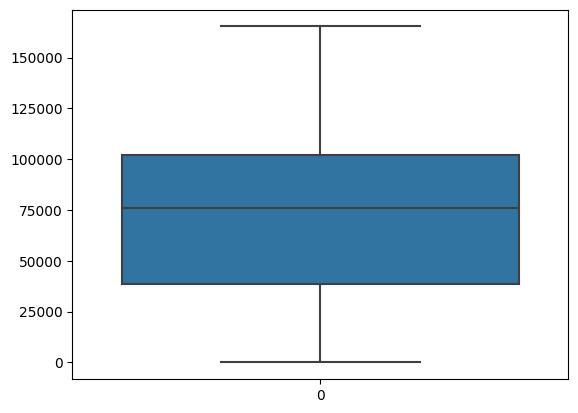

In [9]:
sns.boxplot(sheet['R&D Spend'])

7. Check for Categorical columns and perform encoding

In [10]:
sheet['State'].unique
lenc = preprocessing.LabelEncoder()
sheet['State'] = lenc.fit_transform(sheet['State'])
sheet['State'].unique()

array([2, 0, 1])

8. Split the data into dependent and independent variables

Dependent Values

In [11]:
x = sheet.iloc[:, :-1].values
print(x)


[[1.6534920e+05 1.3689780e+05 4.7178410e+05 2.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 1.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 2.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 1.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 2.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 1.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 2.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 1.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 0.0000000e+00]
 [9.3863750e+04 1.2732038e+05 2.4983944e+05 1.0000000e+00]
 [9.1992390e+04 1.3549507e+05 2.5266493e+05 0.0000000e+00]
 [1.1994324e+05 1.5654742e+05 2.5651292e+05 1.0000000e+00]
 [1.1452361e+05 1.2261684e+05 2.6177623e+05 2.0000000e+00]
 [7.8013110e+04 1.2159755e+05 2.6434606e+05 0.0000000e+0

Independent Values

In [12]:
y = sheet.iloc[:, -1].values
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4  144259.4  141585.52 134307.35 132602.65 129917.04 126992.93
 125370.37 124266.9  122776.86 118474.03 111313.02 110352.25 108733.99
 108552.04 107404.34 105733.54 105008.31 103282.38 101004.64  99937.59
  97483.56  97427.84  96778.92  96712.8   96479.51  90708.19  89949.14
  81229.06  81005.76  78239.91  77798.83  71498.49  69758.98  65200.33
  64926.08  49490.75  42559.73  35673.41  14681.4  192261.83 191792.06
 191050.39 182901.99 166187.94 156991.12 156122.51 155752.6  152211.77
 149759

9. Scale the independent values

In [13]:
scaler = StandardScaler().fit_transform(sheet)
print(scaler)

[[ 2.01819092  0.55696553  2.18783528  1.16731536  2.02880464]
 [ 1.95675646  1.0893969   1.95029024 -1.23401909  2.01670031]
 [ 1.75232048 -0.75766814  1.64392865 -0.03335187  1.99759006]
 [ 1.54982902 -0.1132146   1.43322263  1.16731536  1.7876343 ]
 [ 1.49925539 -1.11632102  1.28814125 -0.03335187  1.3569717 ]
 [ 1.27083396 -0.806604    1.25996984  1.16731536  1.12000182]
 [ 1.3319795   0.93574262 -0.74312422 -1.23401909  1.09762078]
 [ 1.23558377  0.87437939  0.92787631 -0.03335187  1.08808949]
 [ 1.01776417  0.99163696  0.82340982  1.16731536  0.99685469]
 [ 1.08011094 -0.48065199  0.76691751 -1.23401909  0.93368012]
 [ 0.60181303 -0.4102384   0.1210342  -0.03335187  0.83994133]
 [ 0.57410176 -1.10165542  0.29637694 -1.23401909  0.79194993]
 [ 0.4220906   0.20479752  0.29718526 -0.03335187  0.72305339]
 [ 0.38030758  0.50538623  0.32125438 -1.23401909  0.53552041]
 [ 1.00438367  1.27949493  0.35403374 -0.03335187  0.49159626]
 [ 0.88337621  0.03184527  0.39886959  1.16731536  0.42

10. Split the data into training and testing

In [14]:
x_train, X_test, y_train, Y_test, = train_test_split(
    x, y, test_size=0.5, random_state=0
)


In [15]:
print(y_train)

[146121.95 125370.37 192261.83  96712.8  103282.38 126992.93 144259.4
 144259.4  108733.99  96479.51 108733.99  97483.56 152211.77 124266.9
  69758.98 182901.99  97427.84 191050.39 132602.65  96479.51 122776.86
 101004.64  14681.4  126992.93 125370.37  99937.59  77798.83 118474.03
 134307.35  96778.92  81229.06 107404.34  89949.14  71498.49 156122.51
  49490.75 149759.96  81005.76 105733.54 122776.86 141585.52 155752.6
  14681.4   97483.56  35673.41  90708.19 111313.02  65200.33 149759.96
 129917.04 103282.38 107404.34  42559.73  65200.33]


In [16]:
print(Y_test)

[ 64926.08 146121.95  90708.19 191050.39 108552.04 144259.4  124266.9
 155752.6  126992.93  42559.73 101004.64 110352.25  64926.08 111313.02
  89949.14 134307.35 134307.35  96712.8   49490.75 129917.04 132602.65
 152211.77 105733.54 166187.94  96778.92 182901.99 105008.31  35673.41
  99937.59 156122.51  81005.76 192261.83 191792.06 156991.12 141585.52
 118474.03 105008.31 124266.9  110352.25 141585.52 108552.04  97427.84
  69758.98 191792.06  78239.91  71498.49  77798.83 166187.94 129917.04
 125370.37  78239.91  81229.06 156991.12 132602.65]
